In [32]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s, A, i, j, k, z, w = smp.symbols('x y t n a b C c r u s A i j k z w')
f, g, m = smp.symbols('f g m', cls=smp.Function)

# 1

Evaluate the iteraged integral:

∫(1, 5) ∫(pi/2, pi) x sin(y) dy dx

In [4]:
from scipy.integrate import dblquad

# Define the function to integrate
def f(y, x):  # note the order of the arguments
    return x*smp.sin(y)

# Define the limits of x
x_bounds = (1, 5)

# Define the limits of y as functions (in this case constants)
def y_min(x):
    return smp.pi/2

def y_max(x):
    return smp.pi

# Compute the double integral
result, error = dblquad(f, x_bounds[0], x_bounds[1], y_min, y_max)

print("The result of the integral is:", result)

The result of the integral is: 12.0


# 2

Find the volume of the region bounded above by the elliptical paraboloid:

z = 9 - 5x^2 - 4y^2 and below by the rectangle:

R: 0 =< x =< 1, 0 =< y =< 1

In [5]:
from scipy.integrate import dblquad

# Define the function to integrate
def f(y, x):  # note the order of the arguments
    return 9 - 5*x**2 - 4*y**2

# Define the limits of x
x_bounds = (0, 1)

# Define the limits of y as functions (in this case constants)
def y_min(x):
    return 0

def y_max(x):
    return 1

# Compute the double integral
result, error = dblquad(f, x_bounds[0], x_bounds[1], y_min, y_max)

print("The result of the integral is:", result)

The result of the integral is: 6.0


# 3

Sketch the described region of integration:

0 =< y =< 1

0 =< x =< (sin^-1)(y)

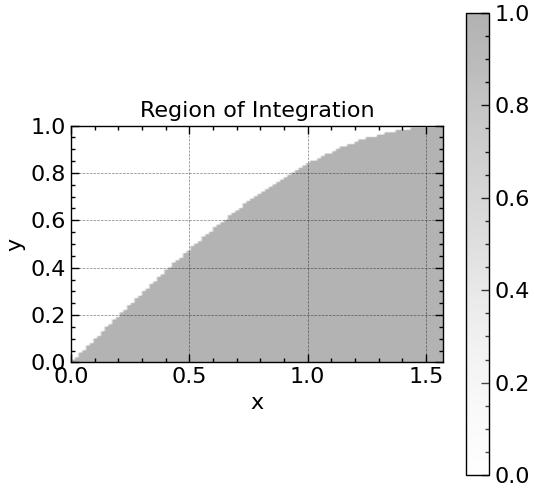

In [6]:
# Create a grid of points
y = np.linspace(0, 1, 100)
x = np.linspace(0, np.pi/2, 100)
X, Y = np.meshgrid(x, y)

# Create a condition for the points in the region of integration
condition = np.where(Y <= np.sin(X), 1, 0)

# Plot the region of integration
plt.figure(figsize=(6, 6))
plt.imshow(condition, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greys', alpha=0.3)
plt.colorbar()

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Set the title
plt.title('Region of Integration')

# Show the plot
plt.show()

# 5

Integrate f(u, v) = v - sqrt(u) over the triangular region cut from the first quadrant of the uv-plane by the line u + v = 25

In [7]:
from scipy.integrate import dblquad

# Define the function to integrate
def f(v, u):  # Note: the order of variables is important for dblquad
    return v - np.sqrt(u)

# Define the limits of u
u_bounds = [0, 25]

# Define the limits of v as functions of u
def v_lower(u):
    return 0

def v_upper(u):
    return 25 - u

# Perform the double integration
result, error = dblquad(f, u_bounds[0], u_bounds[1], v_lower, v_upper)

result

1770.8333333333335

# 6

Sketch the region bounded by the given lines and curves, then express the region's area as an iterated double integral and evaluate the integral.

The curve y = e^x and the lines y = 0, x = 0, and x = ln(7)

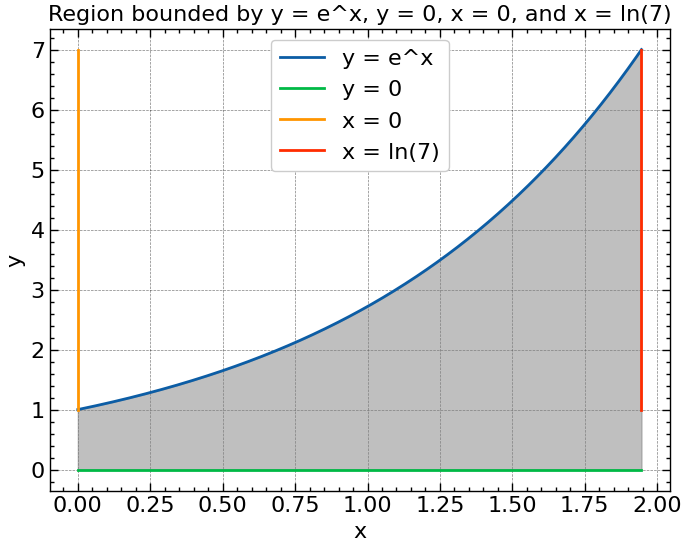

In [8]:
import matplotlib.patches as patches

# Create a range of x values
x = np.linspace(0, np.log(7), 500)

# Compute the corresponding y values for the curve y = e^x
y = np.exp(x)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the curve y = e^x
ax.plot(x, y, label='y = e^x')

# Plot the lines y = 0, x = 0, and x = ln(7)
ax.plot(x, np.zeros_like(x), label='y = 0')
ax.plot(np.zeros_like(y), y, label='x = 0')
ax.plot(np.full_like(y, np.log(7)), y, label='x = ln(7)')

# Fill the region bounded by the curve and the lines
ax.fill_between(x, 0, y, where=(x>=0) & (x<=np.log(7)), color='gray', alpha=0.5)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('x')
ax.set_ylabel('y')

# Set the title of the plot
ax.set_title('Region bounded by y = e^x, y = 0, x = 0, and x = ln(7)')

# Add a legend
ax.legend()

# Display the plot
plt.show()

# 13

Sketch the graph described by the following cylindircal coordinates in 3-D space:

r =< z =< sqrt(49 - r^2)

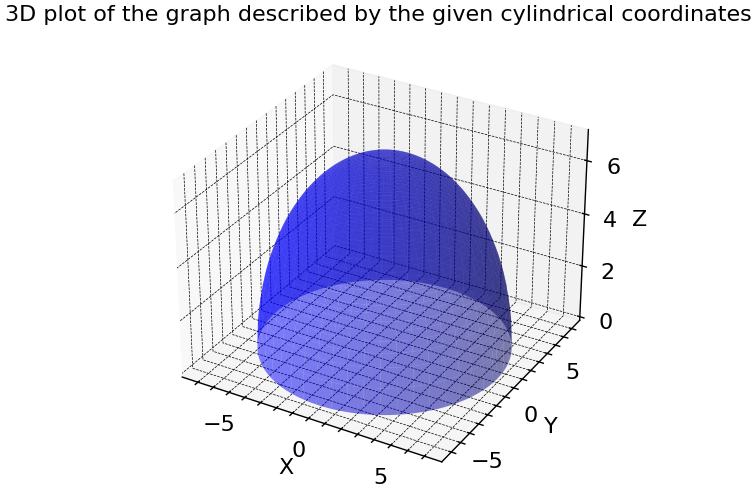

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Define the range of values for r and theta
r = np.linspace(0, 7, 100)
theta = np.linspace(0, 2*np.pi, 100)

# Create a 2D grid for r and theta
r, theta = np.meshgrid(r, theta)

# Convert to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)
z = np.sqrt(49 - r**2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='b', alpha=0.5)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title
ax.set_title('3D plot of the graph described by the given cylindrical coordinates')

# Show the plot
plt.show()

# 14

Evaluate the cylindrical coordinate integral:

∫(0, 2pi) ∫(0, 1) ∫(r, sqrt(6-r^2)) dz r dr d(theta)

In [18]:
from sympy import symbols, integrate, pi, sqrt

# Define the symbols
z, r, theta = symbols('z r theta')

# Define the integrand
f = r

# Perform the triple integral
result = integrate(integrate(integrate(f, (z, r, sqrt(6-r**2))), (r, 0, 1)), (theta, 0, 2*pi))

print("The result is:")
result.simplify()

The result is:


2*pi*(-5*sqrt(5) - 1 + 6*sqrt(6))/3

# 16

Find the volume of the region bounded above by the paraboloid z = 11 - x^2 - y^2 and below by the paraboloid z = 10x^2 + 10y^2

In [19]:
from sympy import symbols, pi, integrate

# Define the symbols
r, theta = symbols('r theta')

# Define the functions z1 and z2
z1 = 11 - r**2
z2 = 10*r**2

# Define the volume integral
V = integrate(integrate((z1 - z2)*r, (r, 0, 1)), (theta, 0, 2*pi))

# Print the result
V

11*pi/2

# 18

Solve the system u = 4x + 3y, v = x + 4y for x and y in terms of u and v. Then find the Jacobian ∂(x, y) / ∂(u, v)

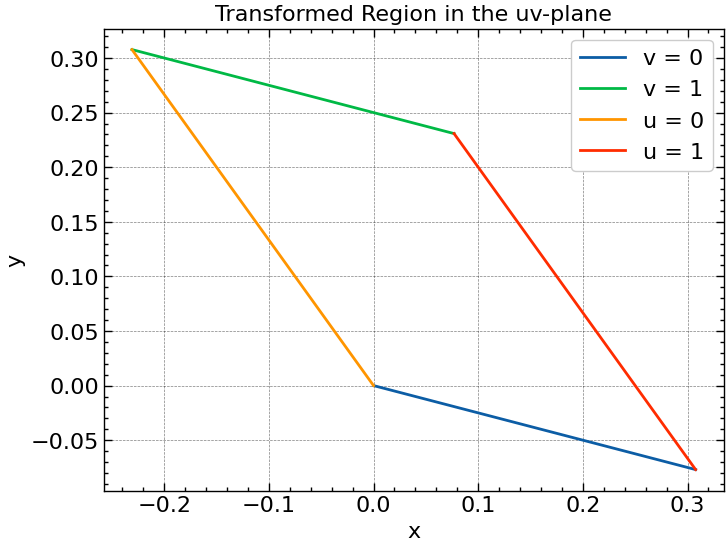

In [30]:
# Define the transformation
def transformation(u, v):
    x = 1/13 * (4*u - 3*v)
    y = 1/13 * (4*v - u)
    return x, y

# Define the values for u and v
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)

# Apply the transformation to the four sides of the unit square
x1, y1 = transformation(u, 0)  # v = 0
x2, y2 = transformation(u, 1)  # v = 1
x3, y3 = transformation(0, v)  # u = 0
x4, y4 = transformation(1, v)  # u = 1

# Plot the transformed region
plt.figure()
plt.plot(x1, y1, label='v = 0')
plt.plot(x2, y2, label='v = 1')
plt.plot(x3, y3, label='u = 0')
plt.plot(x4, y4, label='u = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transformed Region in the uv-plane')
plt.legend()
plt.grid(True)
plt.show()

# 3 - 2

Sketch the described region of integration:

-2 =< y =< 2, y^2 =< x =< 4

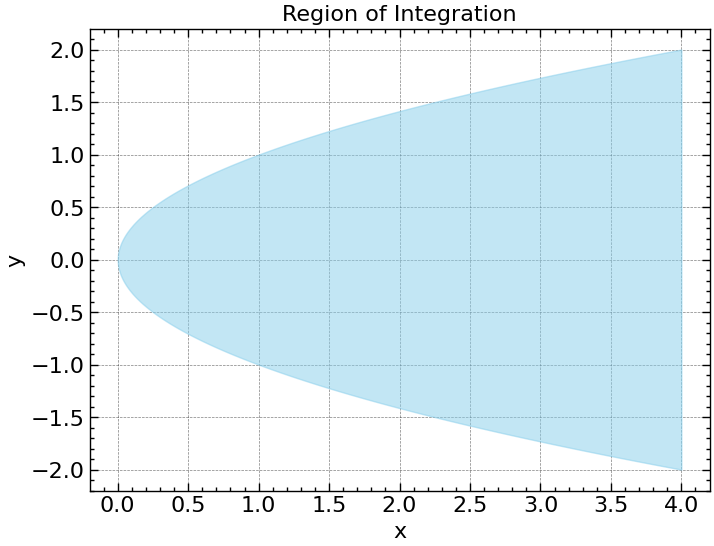

In [33]:
# Create a range of y values
y = np.linspace(-2, 2, 400)

# Create corresponding x values for the boundaries
x_lower = y**2
x_upper = np.full_like(y, 4)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the boundaries
ax.fill_betweenx(y, x_lower, x_upper, color='skyblue', alpha=0.5)

# Label the plot
ax.set_title('Region of Integration')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

# 5 - 2

Given the integral ∫(-pi/3, pi/3) ∫(0, sec(t)) 3cos(t) du dt over a region in the tu-plane, sketch the region and evaluate the integral.

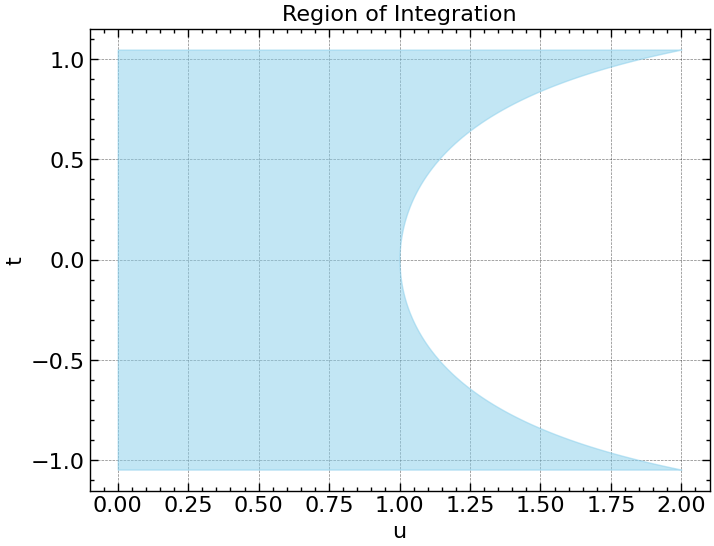

In [34]:
# Create a range of t values
t = np.linspace(-np.pi/3, np.pi/3, 400)

# Create corresponding u values for the boundaries
u_lower = np.zeros_like(t)
u_upper = 1/np.cos(t)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the boundaries
ax.fill_betweenx(t, u_lower, u_upper, color='skyblue', alpha=0.5)

# Label the plot
ax.set_title('Region of Integration')
ax.set_xlabel('u')
ax.set_ylabel('t')

# Show the plot
plt.show()

# 6

Sketch the region bounded by the given lines and curves. Then express the region's area as an iterated double integral and evaluate the integral:

The curve y = e^x and the lines y = 0, x = 0, x = ln(18)

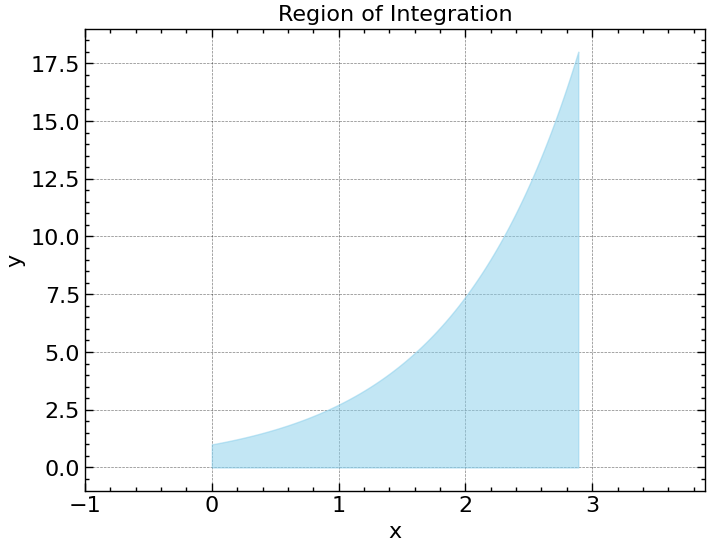

In [36]:
# Create a range of x values
x = np.linspace(0, np.log(18), 400)

# Create corresponding y values for the boundaries
y_lower = np.zeros_like(x)
y_upper = np.exp(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the boundaries
ax.fill_between(x, y_lower, y_upper, color='skyblue', alpha=0.5)

# Label the plot
ax.set_title('Region of Integration')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Set the limits of the x and y axes to "zoom out"
ax.set_xlim([-1, np.log(18) + 1])
ax.set_ylim([-1, np.exp(np.log(18)) + 1])

# Show the plot
plt.show()

# 8

Sketch the region of integration and convert the polar integral to a Cartesian integral or sum of integrals.

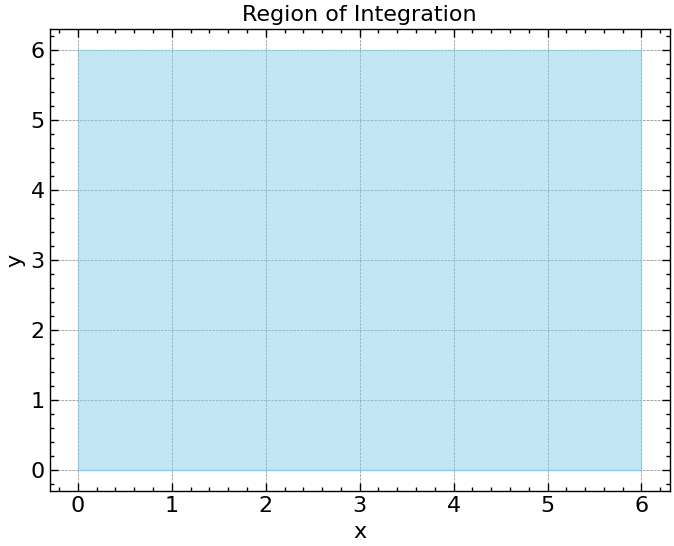

In [37]:
# Create a range of theta values
theta = np.linspace(0, np.pi/4, 400)

# Create corresponding r values for the boundaries
r_upper = 6 / np.cos(theta)
r_lower = np.zeros_like(theta)

# Convert polar to Cartesian coordinates
x_upper = r_upper * np.cos(theta)
y_upper = r_upper * np.sin(theta)
x_lower = r_lower * np.cos(theta)
y_lower = r_lower * np.sin(theta)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the boundaries
ax.fill_betweenx(y_upper, x_lower, x_upper, color='skyblue', alpha=0.5)
ax.fill_betweenx(y_lower, x_lower, x_upper, color='skyblue', alpha=0.5)

# Label the plot
ax.set_title('Region of Integration')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

# 13 - 2

Sketch the graph described by the following cylindrical coordinates in 3D space:

r^2 + z^2 = 64

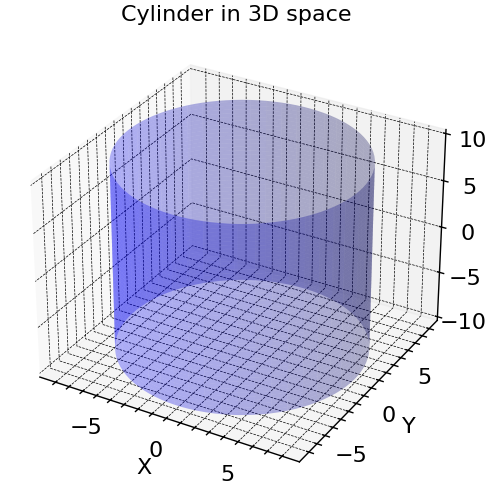

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Define the radius
r = 8

# Create a range of theta and z values
theta = np.linspace(0, 2*np.pi, 100)
z = np.linspace(-10, 10, 100)

# Create a grid of theta and z values
theta, z = np.meshgrid(theta, z)

# Convert to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, color='b', alpha=0.3)

# Label the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cylinder in 3D space')

# Show the plot
plt.show()

# 18 - 2

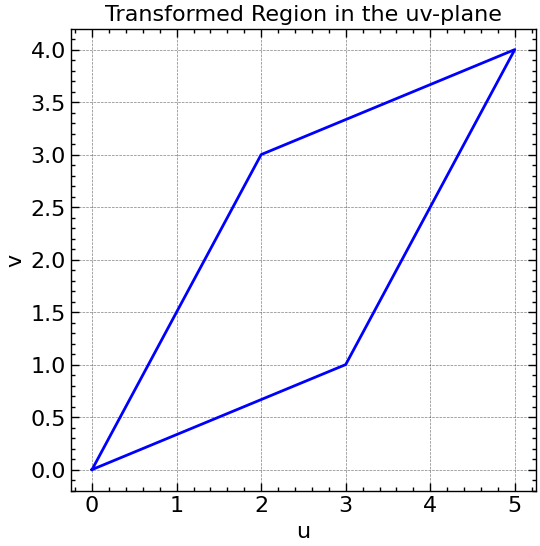

In [39]:
# Define the transformation
def transform(x, y):
    u = 3*x + 2*y
    v = x + 3*y
    return u, v

# Define the vertices of the square in the xy-plane
x = np.array([0, 1, 1, 0, 0])
y = np.array([0, 0, 1, 1, 0])

# Transform the vertices to the uv-plane
u, v = transform(x, y)

# Plot the transformed region
plt.figure(figsize=(6,6))
plt.plot(u, v, 'b-')
plt.xlabel('u')
plt.ylabel('v')
plt.title('Transformed Region in the uv-plane')
plt.grid(True)
plt.show()